In [2]:
import pandas as pd

In [2]:
df1 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/1/emotion.csv")
df2 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/2/emotion.csv")
df3 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/3/emotion.csv")
df4 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/4/emotion.csv")
df5 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/5/emotion.csv")
df6 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/6/emotion.csv")
df7 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/7/emotion.csv")
df8 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/8/emotion.csv")
df9 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/9/emotion.csv")
df10 = pd.read_csv("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/emotional_data/10/emotion.csv")

In [3]:
print(df1.columns)

Index(['movie_id', 'image_seq', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'dominant_emotion', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


In [4]:
df1.head(1)

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,0.0,4.31735,0.000594,2.87979,1.65035,2.77998,0.600814,87.7711,neutral,NaN,NaN,NaN,NaN


In [6]:
columns_for_EDA = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [7]:
with pd.ExcelWriter("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/emo_avg.xlsx") as writer:
    df1[columns_for_EDA].mean().to_excel(writer,sheet_name='1')
    df2[columns_for_EDA].mean().to_excel(writer,sheet_name='2')
    df3[columns_for_EDA].mean().to_excel(writer,sheet_name='3')
    df4[columns_for_EDA].mean().to_excel(writer,sheet_name='4')
    df5[columns_for_EDA].mean().to_excel(writer,sheet_name='5')
    df6[columns_for_EDA].mean().to_excel(writer,sheet_name='6')
    df7[columns_for_EDA].mean().to_excel(writer,sheet_name='7')
    df8[columns_for_EDA].mean().to_excel(writer,sheet_name='8')
    df9[columns_for_EDA].mean().to_excel(writer,sheet_name='9')
    df10[columns_for_EDA].mean().to_excel(writer,sheet_name='10')

In [9]:
import pandas as pd

# Create a dictionary to store the additional column data for each sheet
additional_data = {
    '1': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],  # Replace with your additional data
    '2': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '3': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '4': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '5': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '6': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '7': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '8': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '9': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'],
    '10': ['-0.4','-0.2','0.2','0.5','0.2','0.3','0.4'] 
}

# Specify the path to your Excel file
excel_file_path = "C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/emo_avg.xlsx"

# Open the existing Excel file
with pd.ExcelFile(excel_file_path) as xls:
    # Create a writer to update the Excel file
    with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
        # Loop through each sheet and add the additional column
        for sheet_name, data in additional_data.items():
            # Read the existing data into a DataFrame
            df = pd.read_excel(xls, sheet_name=sheet_name)
            
            # Add the new column to the DataFrame
            df['Weight'] = data  # Replace 'NewColumn' with your column name
            
            # Write the updated DataFrame back to the same sheet
            df.to_excel(writer, sheet_name=sheet_name, index=False)


In [12]:
# Read the first 10 worksheets into a dictionary of DataFrames
sheet_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sheet_data = {}

for sheet_name in sheet_names:
    sheet_data[sheet_name] = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Define the columns for which you want to calculate the weighted mean
weighted_columns = ['Average']

# Calculate the weighted means for each sheet
weighted_means = {}
for sheet_name, df in sheet_data.items():
    # Calculate the weighted mean for each column
    weighted_values = df[weighted_columns].mul(df['Weight'], axis=0) 
    total_weights = df['Weight'].sum() 
    weighted_mean = weighted_values.sum() / total_weights
    weighted_means[sheet_name] = weighted_mean

# Create a DataFrame for the 11th worksheet with the weighted means
W_means = pd.DataFrame({'Worksheet Name': list(weighted_means.keys()), 'Weighted Mean': list(weighted_means.values())})

# Open the Excel file again to write the 11th worksheet
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
    W_means.to_excel(writer, sheet_name='weighted_means', index=False)

print("Weighted means added to Sheet11 in the Excel file.")


Weighted means added to Sheet11 in the Excel file.


In [17]:
df = pd.read_excel("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/emo_avg.xlsx",sheet_name='weighted_means')

In [14]:
import matplotlib.pyplot as plt

In [19]:
df.head(1)

,Candidate,Weighted Mean
0,1,21.440238


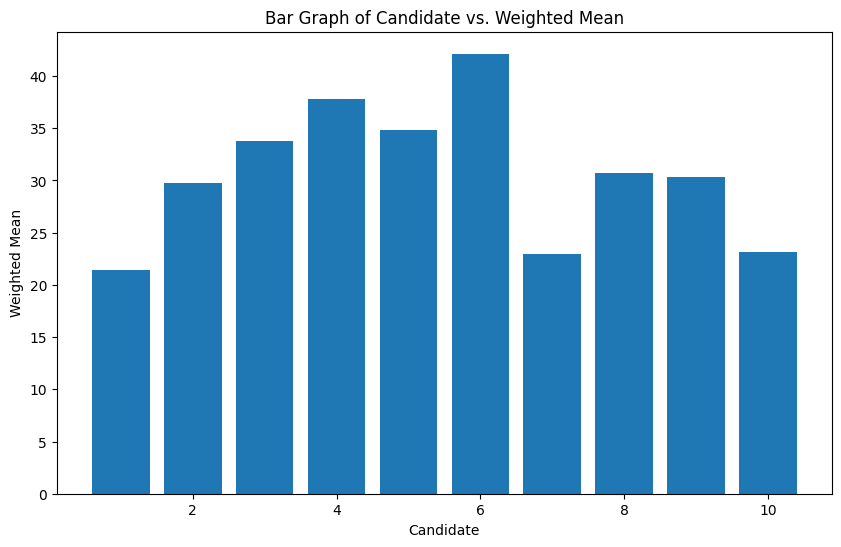

In [24]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Candidate'], df['Weighted Mean'])
plt.xlabel('Candidate')
plt.ylabel('Weighted Mean')
plt.title('Bar Graph of Candidate vs. Weighted Mean')
plt.xticks(rotation=0)
plt.show()

In [34]:
df_sorted = df.sort_values(by='Weighted Mean', ascending=False)
df_sorted.head(2)

,Candidate,Weighted Mean
5,6,42.138191
3,4,37.797335


In [14]:
dfe_individual_parameters = pd.read_excel("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/emo_avg.xlsx",sheet_name="individual_parameters",engine="openpyxl")

In [7]:
import matplotlib.pyplot as plt

In [15]:
parameters = ['angry', 'disgust', 'fear', 'happy', 'sad','surprise', 'neutral']

In [16]:
dfe_individual_parameters.columns

Index(['Candidate', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise',
       'neutral'],
      dtype='object')

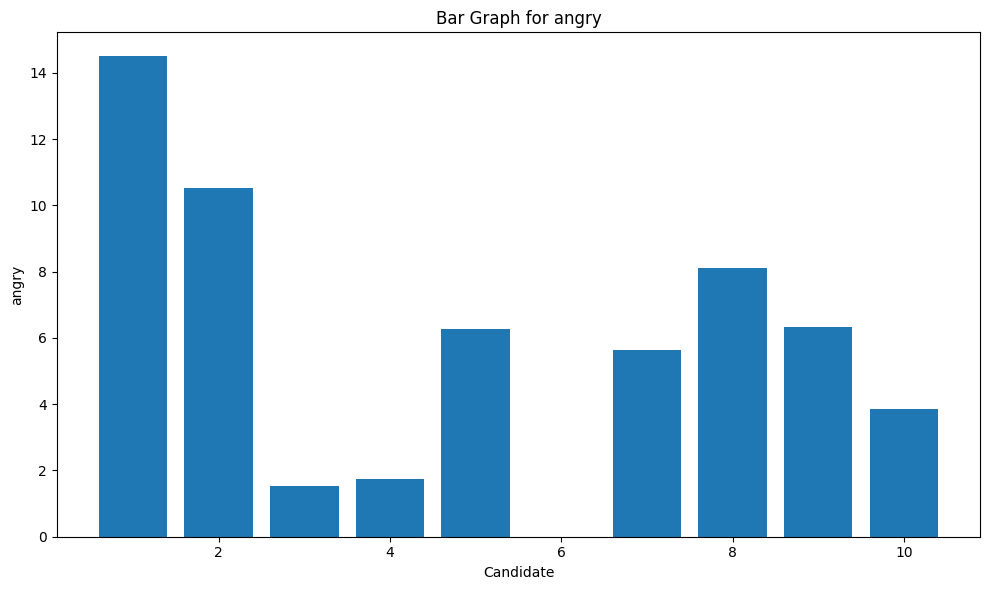

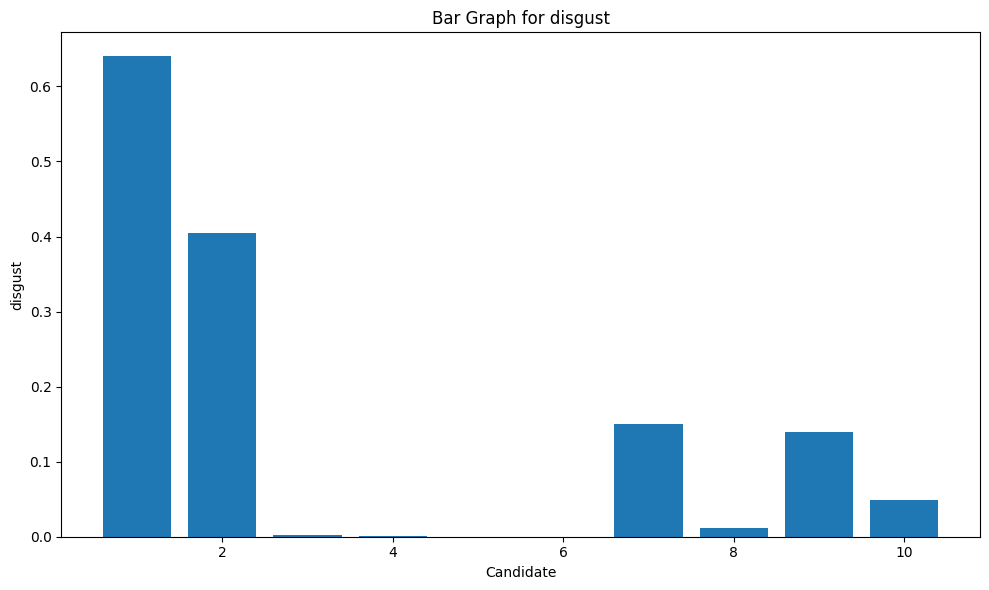

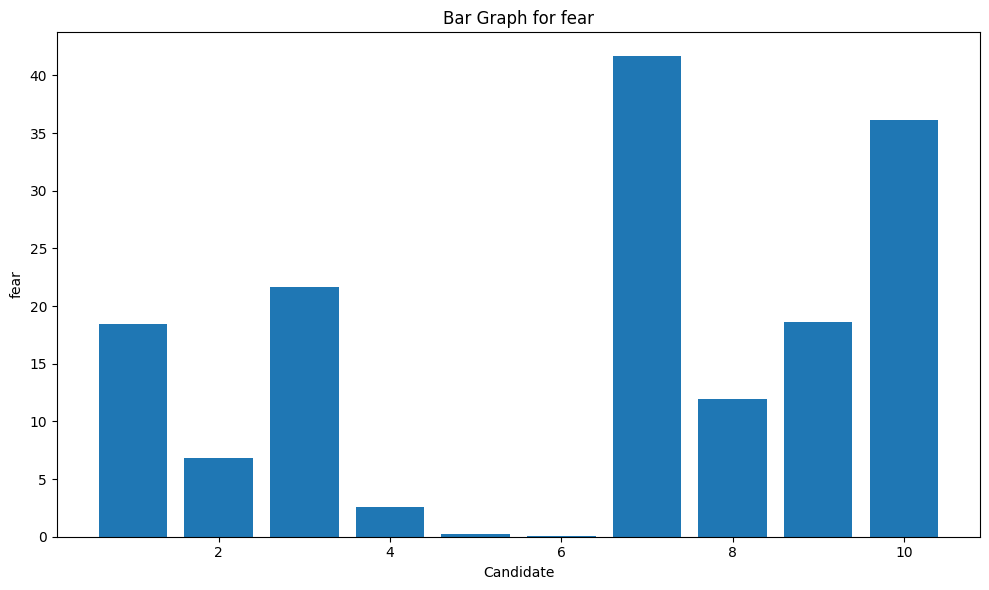

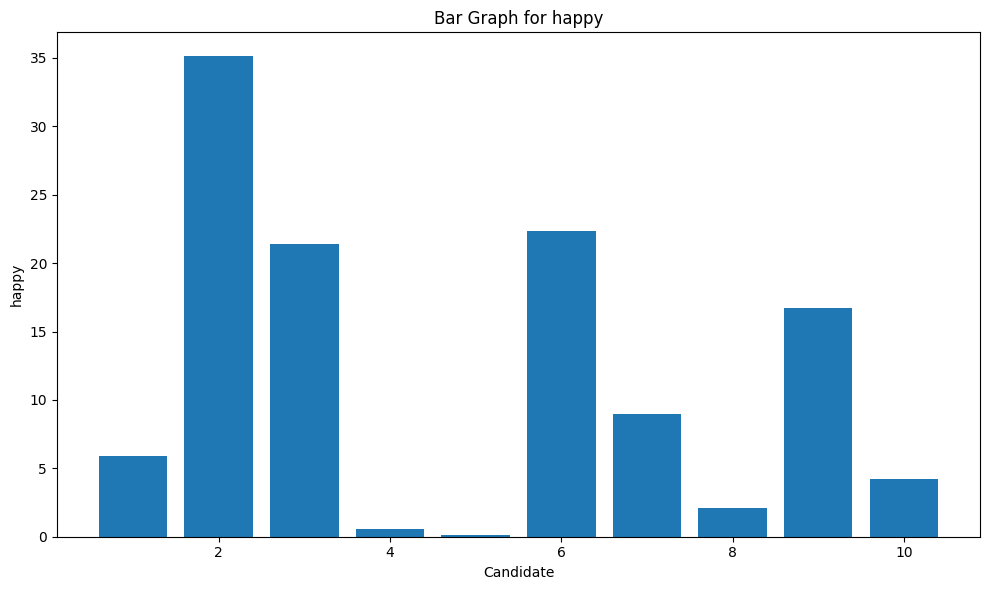

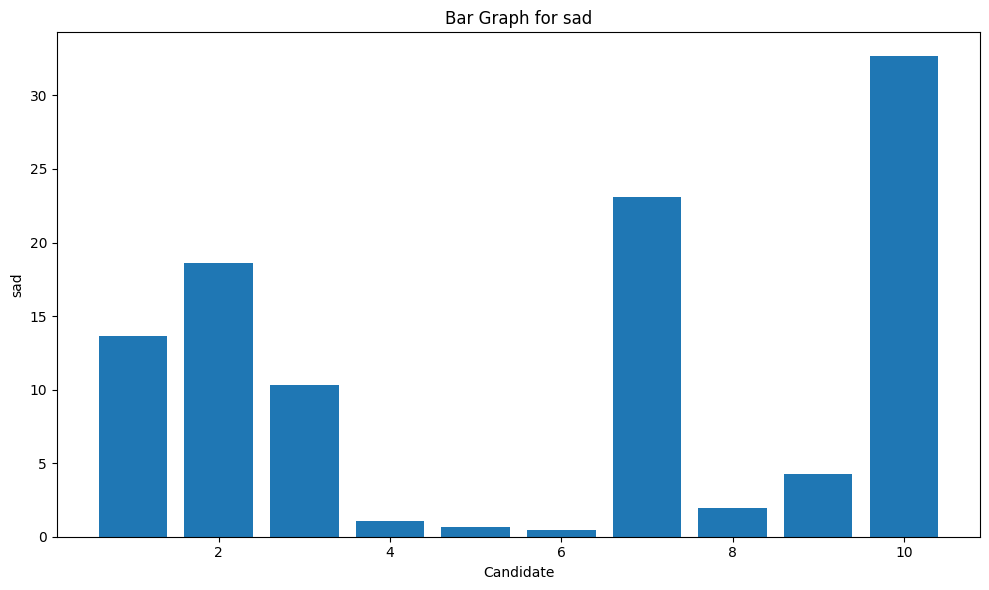

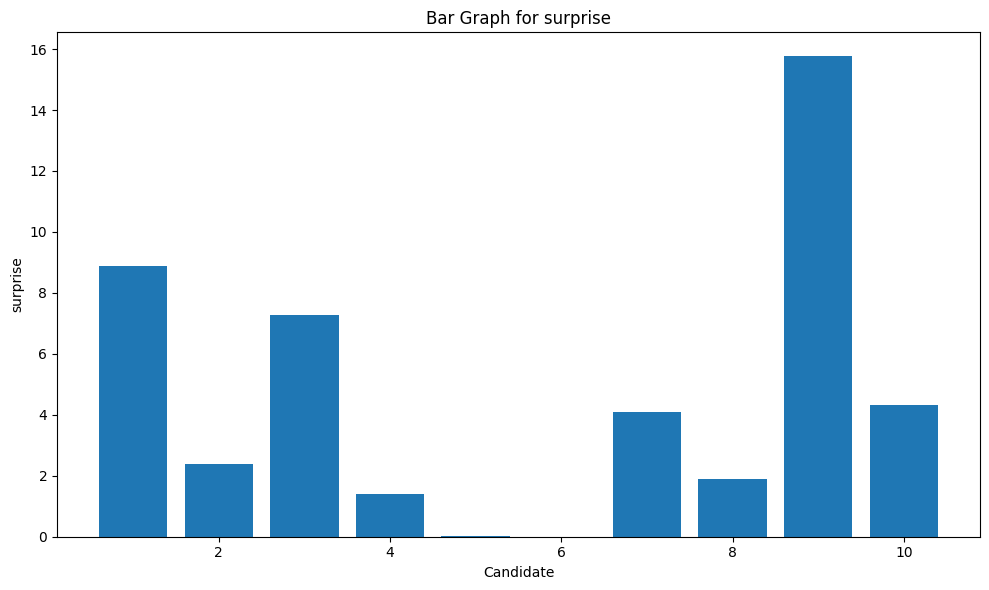

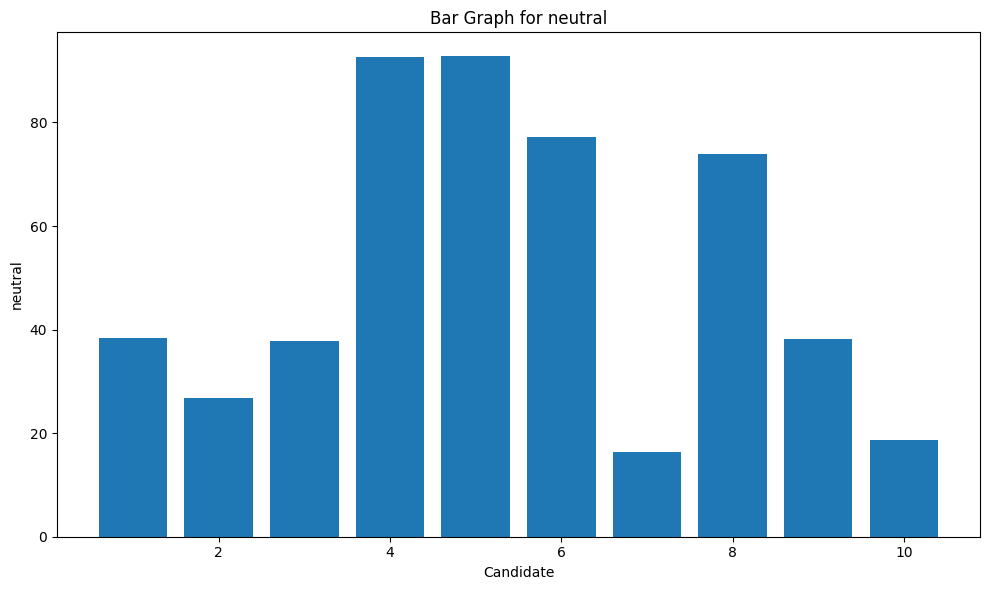

In [17]:
# Loop through each parameter and create a bar graph
for parameter in parameters:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(dfe_individual_parameters["Candidate"], dfe_individual_parameters[parameter])
    plt.xlabel("Candidate")
    plt.ylabel(parameter)
    plt.title(f"Bar Graph for {parameter}")
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Save or display the graph
    # plt.savefig(f"{parameter}_bar_graph.png")  # Save as an image file
    plt.show()  # Uncomment to display the graph interactively

# If you want to show or save all the parameter graphs together, you can do that outside the loop.
# plt.show()
